# Customize grid, colors, and tick labels

This notebook focuses on **presentation controls** for Smith charts:

- turning major/minor grids on and off
- changing the number of major divisions (tick locations)
- changing minor grid density
- enabling the “fancy” grid style
- controlling tick-label formatting (precision, symmetry)
- changing grid **colors** (major/minor separately)

## Recommended configuration pattern

`pysmithchart` supports both:

- `smith_params={...}` (recommended for clarity), and
- direct dot-notation kwargs like `**{'grid.major.enable': True}` (backwards compatible).

In documentation, a practical pattern is to define a reusable configuration dictionary and pass it with `**config`:

```python
sc = {
    "grid.major.enable": True,
    "grid.minor.enable": False,
}
ax = plt.subplot(111, projection="smith", **sc)
```

In [1]:
%config InlineBackend.figure_format = 'retina'

import sys
import numpy as np
import matplotlib.pyplot as plt

if sys.platform == "emscripten":
    import piplite

    await piplite.install("pysmithchart")

import pysmithchart

## 1. Default grid and ticks

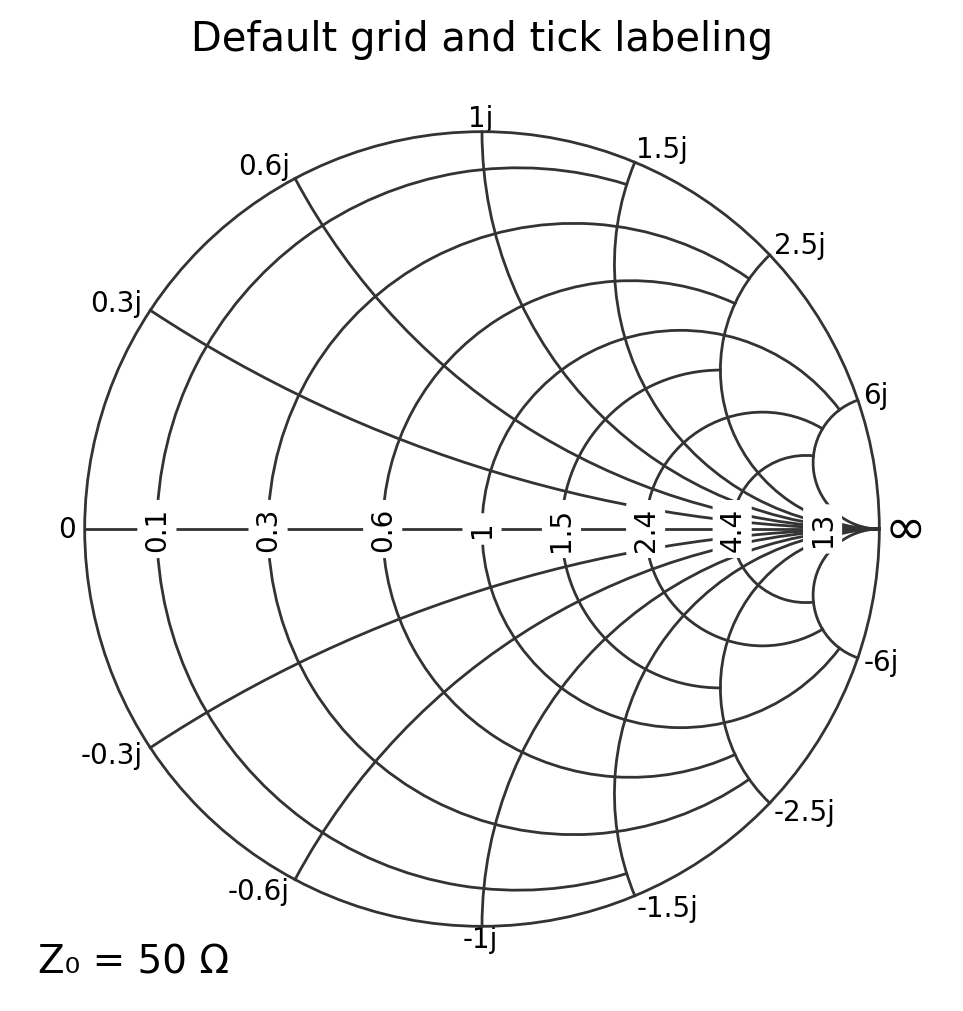

In [2]:
sc = {}
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", **sc)
ax.set_title("Default grid and tick labeling")
plt.show()

## 2. Enable/disable major and minor grids (reusable config)

This uses dot-notation keys passed directly as kwargs.

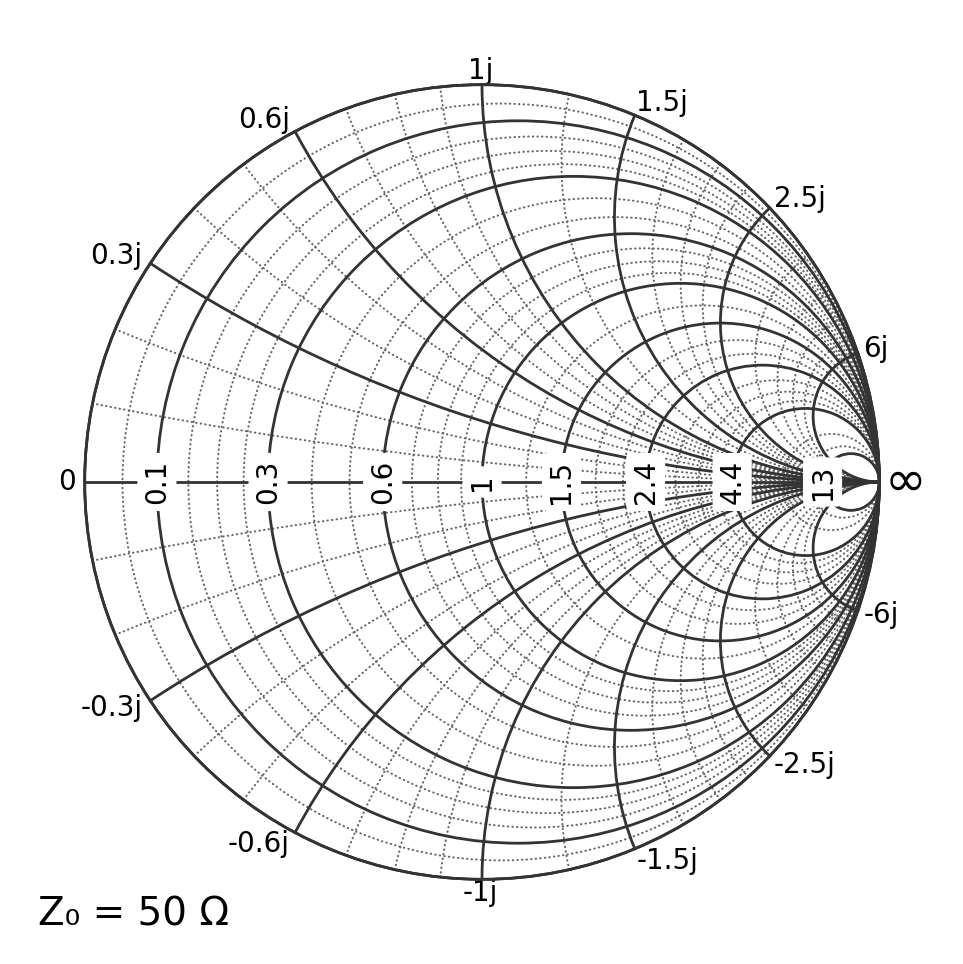

In [3]:
sc = {
    "grid.major.enable": True,
    "grid.minor.enable": True,
    "grid.minor.xdivisions": None,
    "grid.minor.ydivisions": None,
    "grid.major.fancy": False,
}

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", **sc)
plt.show()

### Updating an existing axes

If the axes already exists, update the Smith-chart parameters and then rebuild the chart:

```python
ax.update_scParams(**{"grid.minor.enable": True})
ax.clear()
```

`clear()` is important because gridlines/tick locators are assembled during Smith-chart initialization.

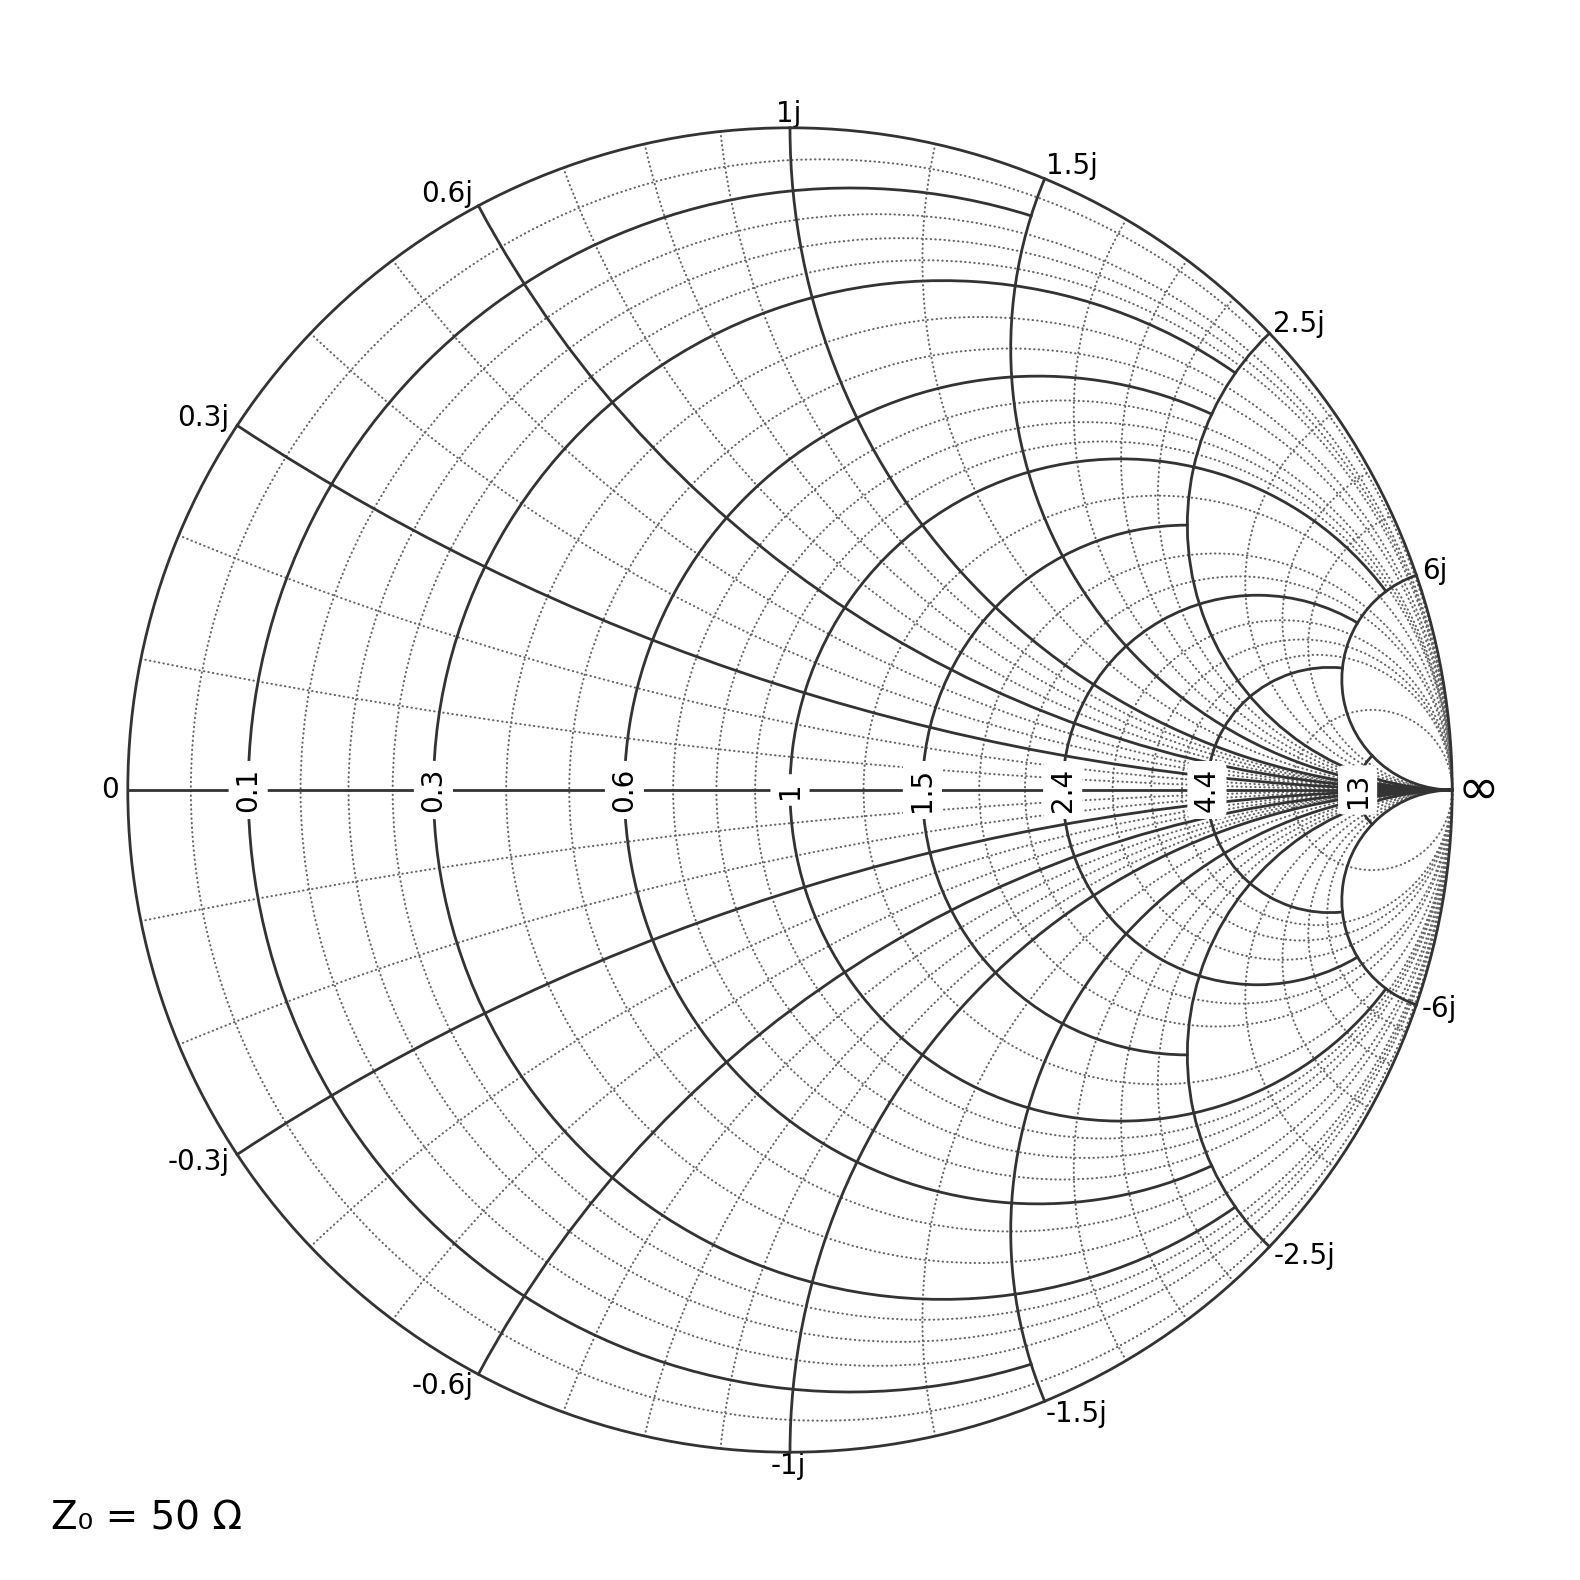

In [14]:
sc = {"grid.minor.enable": False}
plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", **sc)
ax.set_title("Minor grid toggled ON after creation")

ax.update_scParams(**{"grid.minor.enable": True})
ax.clear()  # rebuild to apply locator/grid settings
plt.show()

## 3. Changing grid colors

You can change major/minor grid colors independently:

- `grid.major.color`
- `grid.minor.color`

This is particularly useful for classroom figures where you want the major grid to stand out.

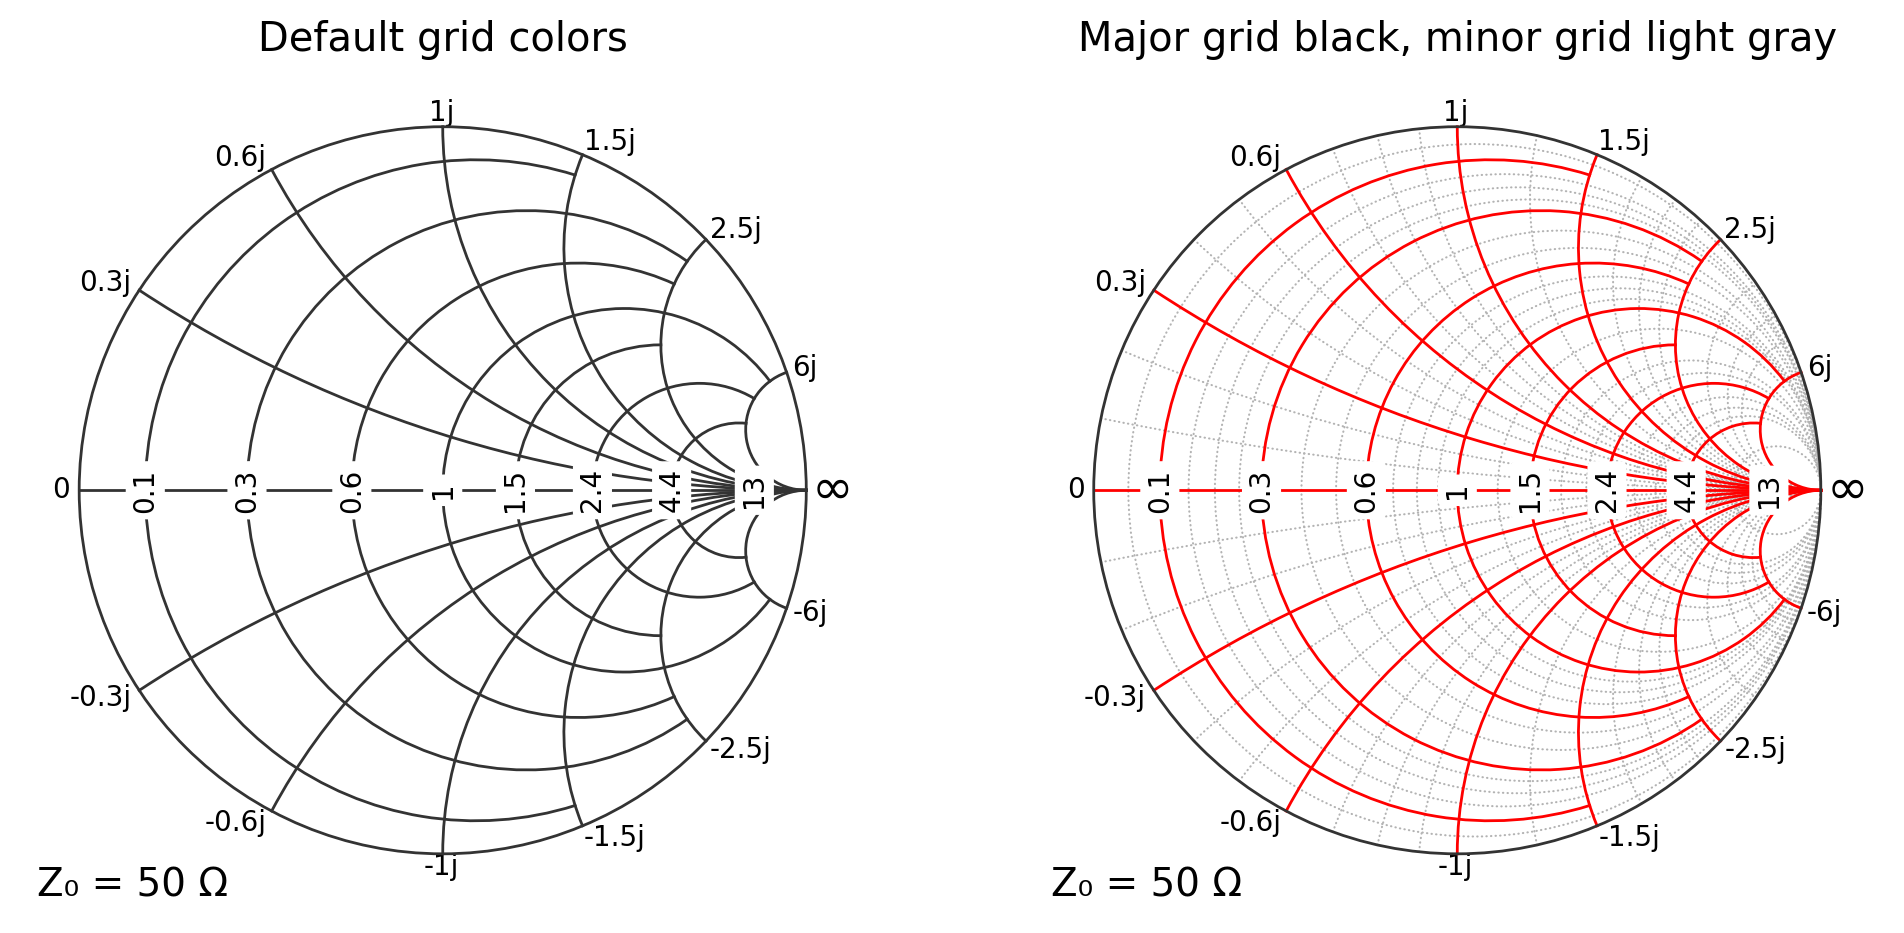

In [5]:
plt.figure(figsize=(12, 6))

# Default colors
ax1 = plt.subplot(121, projection="smith")
ax1.set_title("Default grid colors")

# Customized colors
sc_color = {
    "grid.major.enable": True,
    "grid.minor.enable": True,
    "grid.major.color": "red",
    "grid.minor.color": "0.7",  # grayscale string is convenient
}
ax2 = plt.subplot(122, projection="smith", **sc_color)
ax2.set_title("Major grid black, minor grid light gray")

plt.show()

### Color + line styling together

Common style keys include:

- `grid.major.linestyle`, `grid.major.linewidth`, `grid.major.alpha`
- `grid.minor.linestyle`, `grid.minor.linewidth`, `grid.minor.alpha`

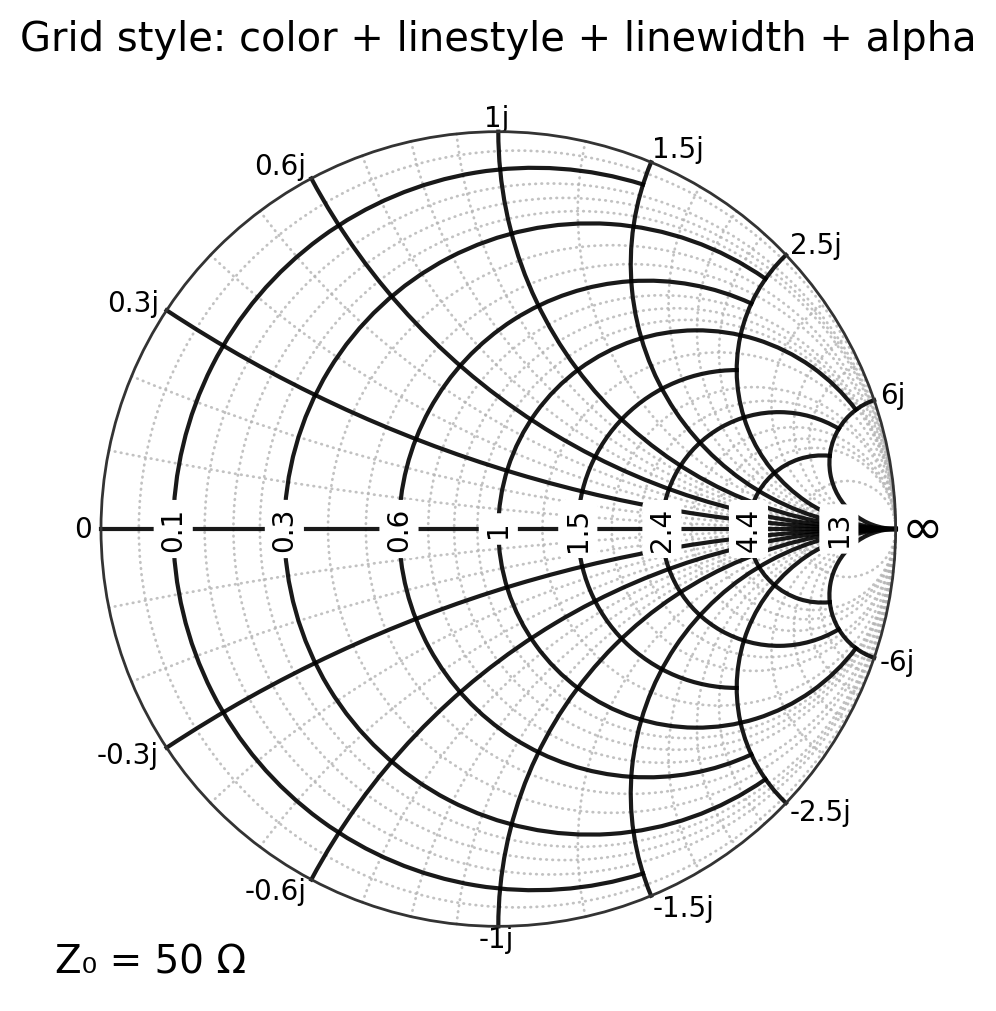

In [6]:
sc_style = {
    "grid.major.enable": True,
    "grid.minor.enable": True,
    "grid.major.color": "black",
    "grid.major.linestyle": "-",
    "grid.major.linewidth": 1.5,
    "grid.major.alpha": 0.9,
    "grid.minor.color": "0.7",
    "grid.minor.linestyle": "--",
    "grid.minor.linewidth": 1.0,
    "grid.minor.alpha": 0.8,
}

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", **sc_style)
ax.set_title("Grid style: color + linestyle + linewidth + alpha")
plt.show()

## 3a. Styling the outer boundary (Smith-circle frame)

The outer Smith-chart boundary (the chart frame) is now controlled through Smith-chart parameters:

- `grid.outer.enable`
- `grid.outer.color`
- `grid.outer.linestyle`
- `grid.outer.linewidth`
- `grid.outer.alpha`

This is useful when you want the boundary to stand out more strongly than the grid, especially in teaching figures.

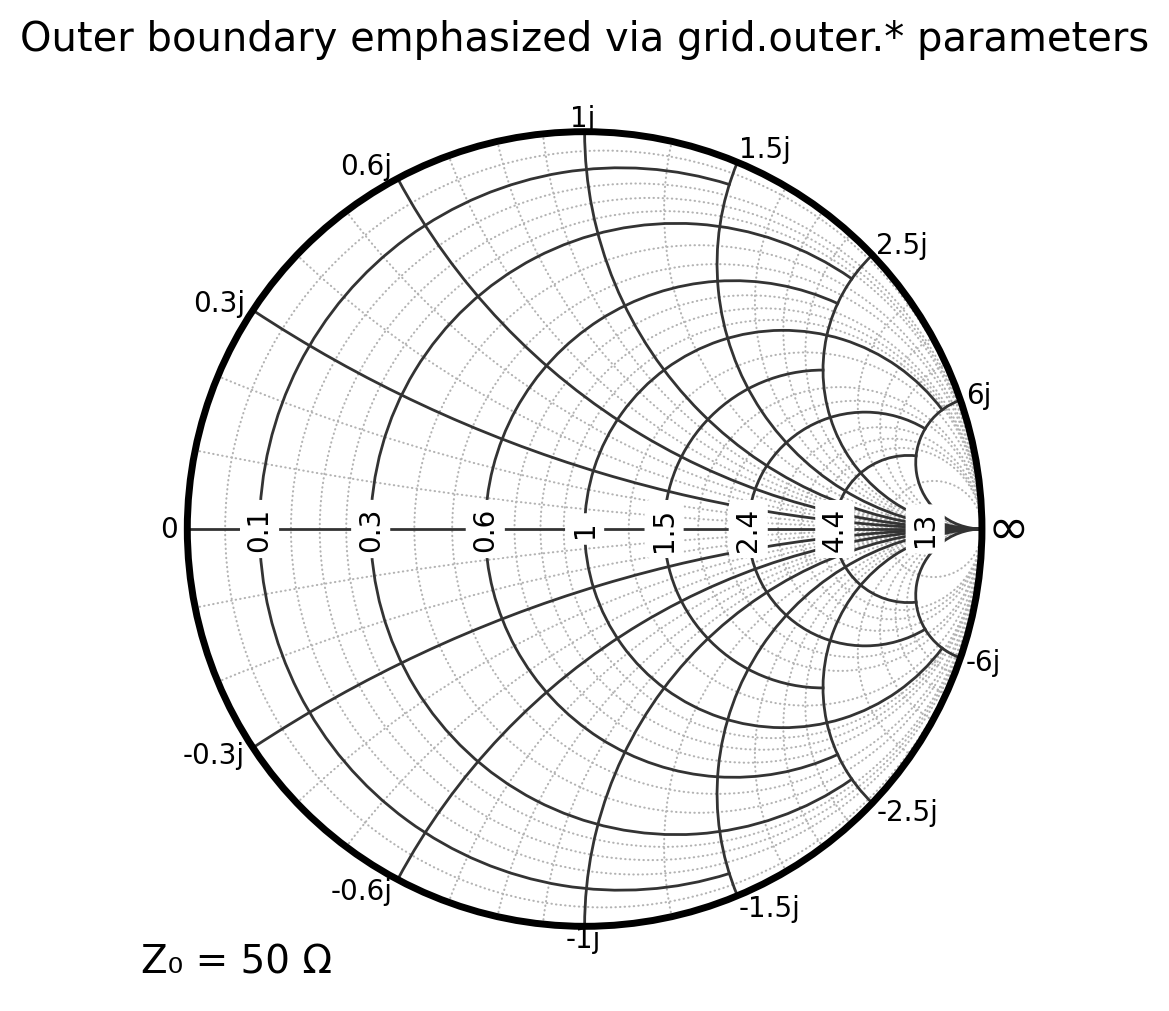

In [7]:
# Boundary styling example
sc_boundary = {
    "grid.major.enable": True,
    "grid.minor.enable": True,
    "grid.major.color": "0.2",
    "grid.minor.color": "0.7",
    "grid.outer.enable": True,
    "grid.outer.color": "black",
    "grid.outer.linewidth": 2.5,
    "grid.outer.linestyle": "-",
    "grid.outer.alpha": 1.0,
}

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", **sc_boundary)
ax.set_title("Outer boundary emphasized via grid.outer.* parameters")
plt.show()

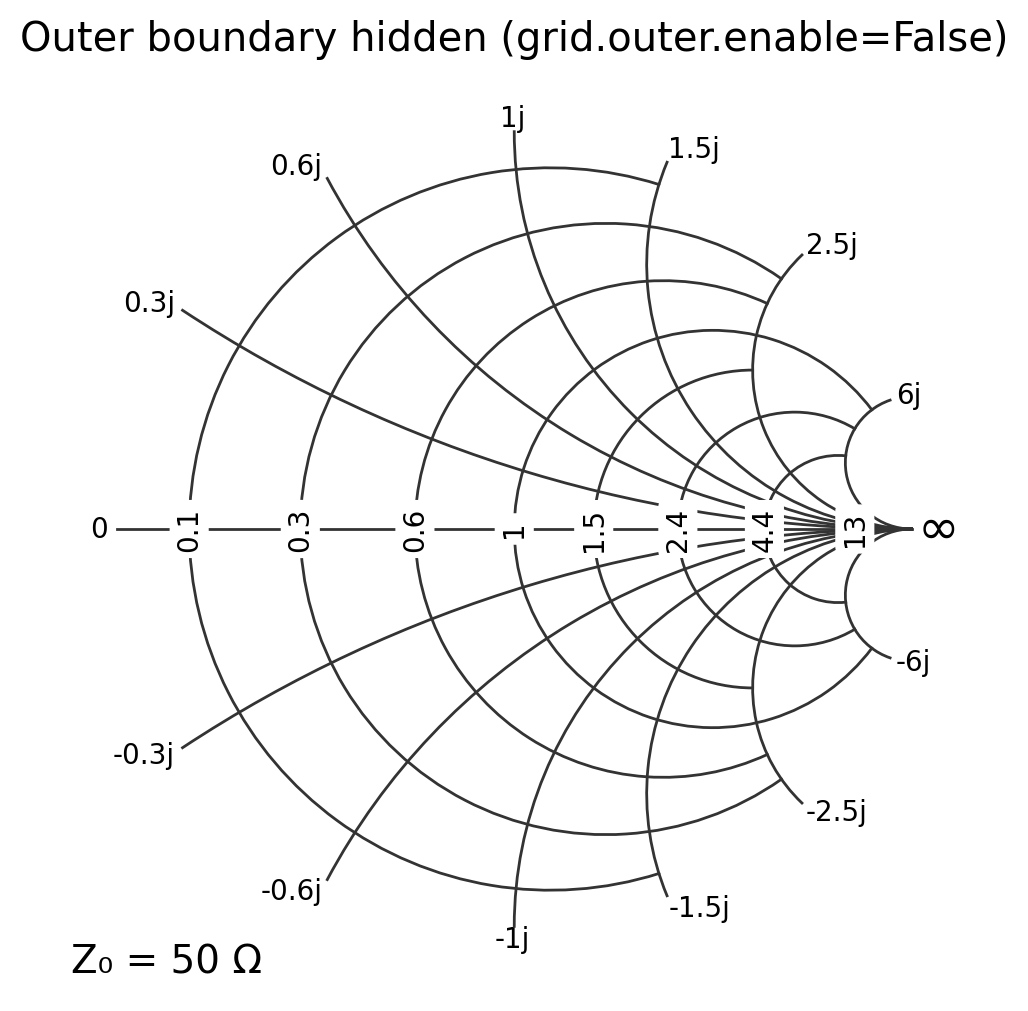

In [8]:
# Hiding the outer boundary entirely (occasionally useful for overlays)
sc_no_boundary = {
    "grid.outer.enable": False,
}

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", **sc_no_boundary)
ax.set_title("Outer boundary hidden (grid.outer.enable=False)")
plt.show()

## 3b. Using alpha to emphasize major vs minor grids

With `grid.major.alpha` and `grid.minor.alpha`, you can keep grid colors the same
but visually emphasize the **major grid** using transparency.

This is especially effective for lecture figures and slides, where you want
students to focus on the major resistance/reactance circles without losing the
minor-grid context.

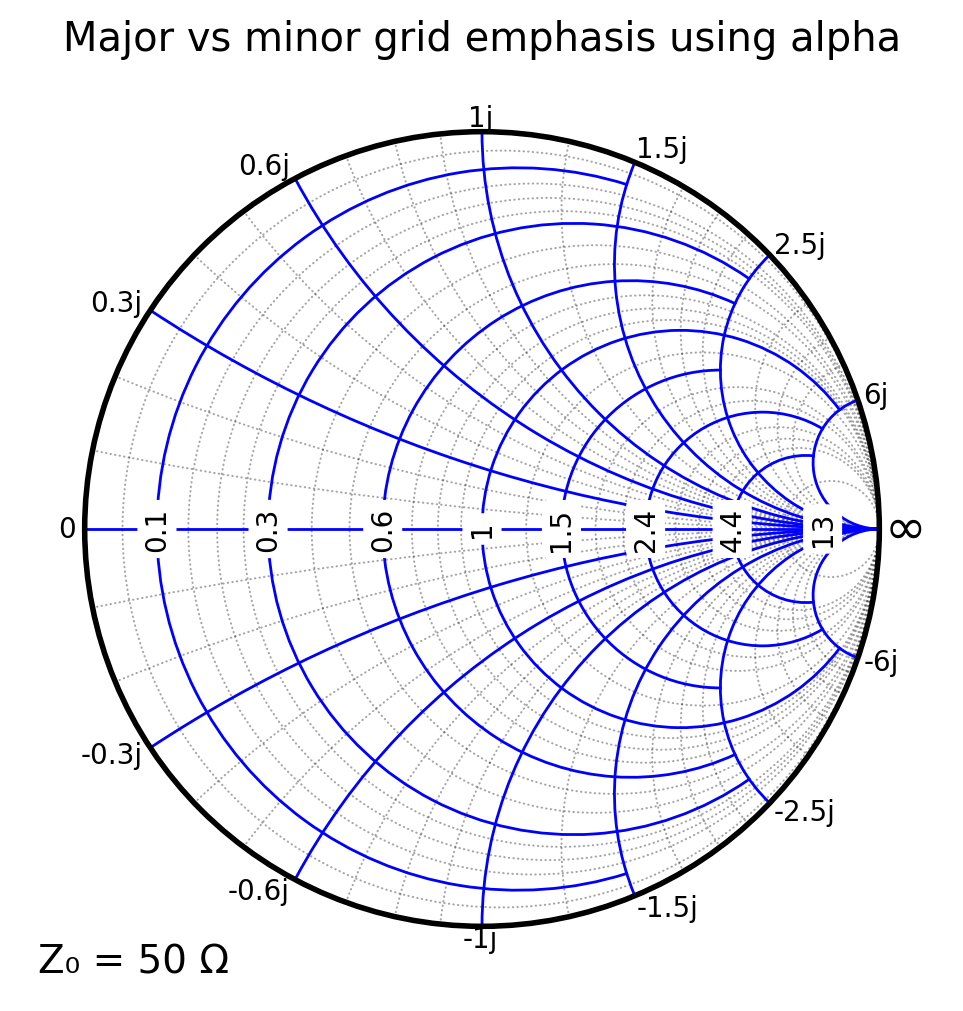

In [16]:
# Same colors, different alpha values
sc_alpha = {
    "grid.major.enable": True,
    "grid.minor.enable": True,
    "grid.major.color": "blue",
    "grid.minor.color": "black",
    "grid.major.alpha": 1.0,  # fully opaque
    "grid.minor.alpha": 0.35,  # lighter minor grid
    "grid.outer.color": "black",
    "grid.outer.linewidth": 2.0,
}

plt.figure(figsize=(6, 6))
ax = plt.subplot(111, projection="smith", **sc_alpha)
ax.set_title("Major vs minor grid emphasis using alpha")
plt.show()

## 4. Changing the number of major divisions (tick locations)

Major tick placement is controlled by:

- `grid.major.xmaxn` (real-axis divisions / resistance circles)
- `grid.major.ymaxn` (imag-axis divisions / reactance arcs)

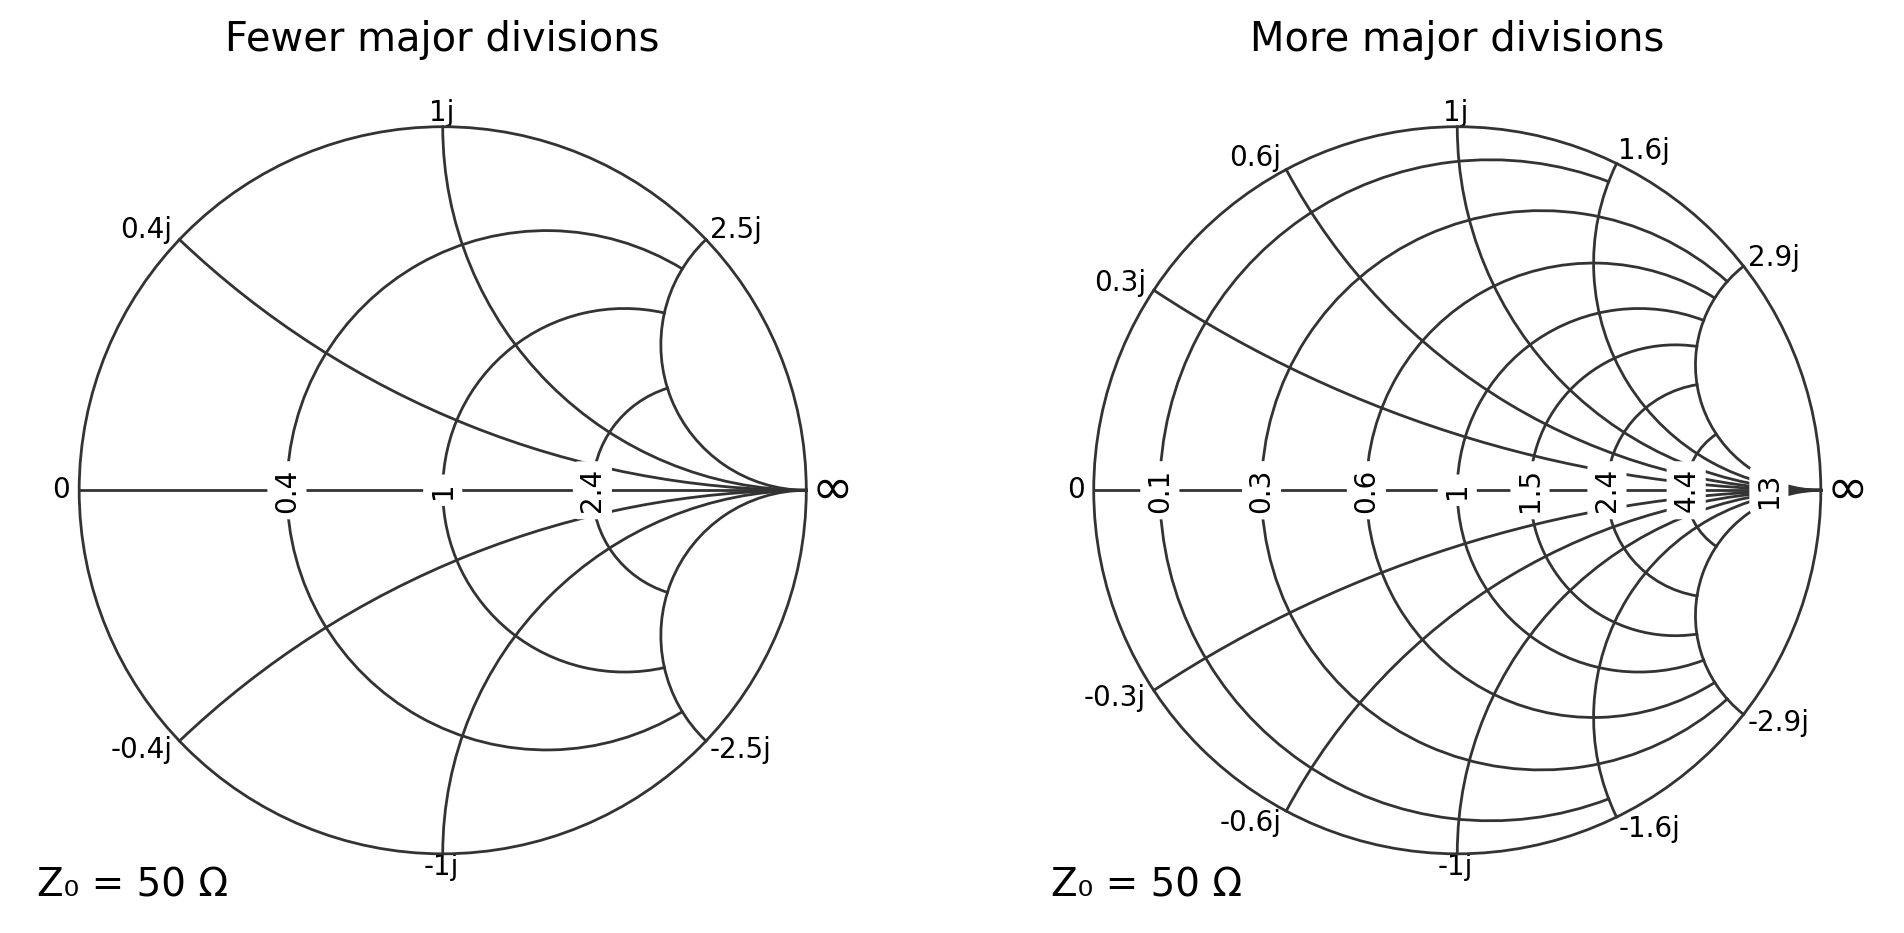

In [10]:
plt.figure(figsize=(12, 6))

sc = {"grid.major.xdivisions": 4, "grid.major.ydivisions": 6}
ax = plt.subplot(121, projection="smith", **sc)
ax.set_title("Fewer major divisions")

sc = {"grid.major.xdivisions": 10, "grid.major.ydivisions": 12}
ax = plt.subplot(122, projection="smith", **sc)
ax.set_title("More major divisions")

plt.show()

## 5. Minor grid density

Minor tick placement is controlled by:

- `grid.minor.xauto` (minor subdivisions between major x ticks)
- `grid.minor.yauto` (minor subdivisions between major y ticks)

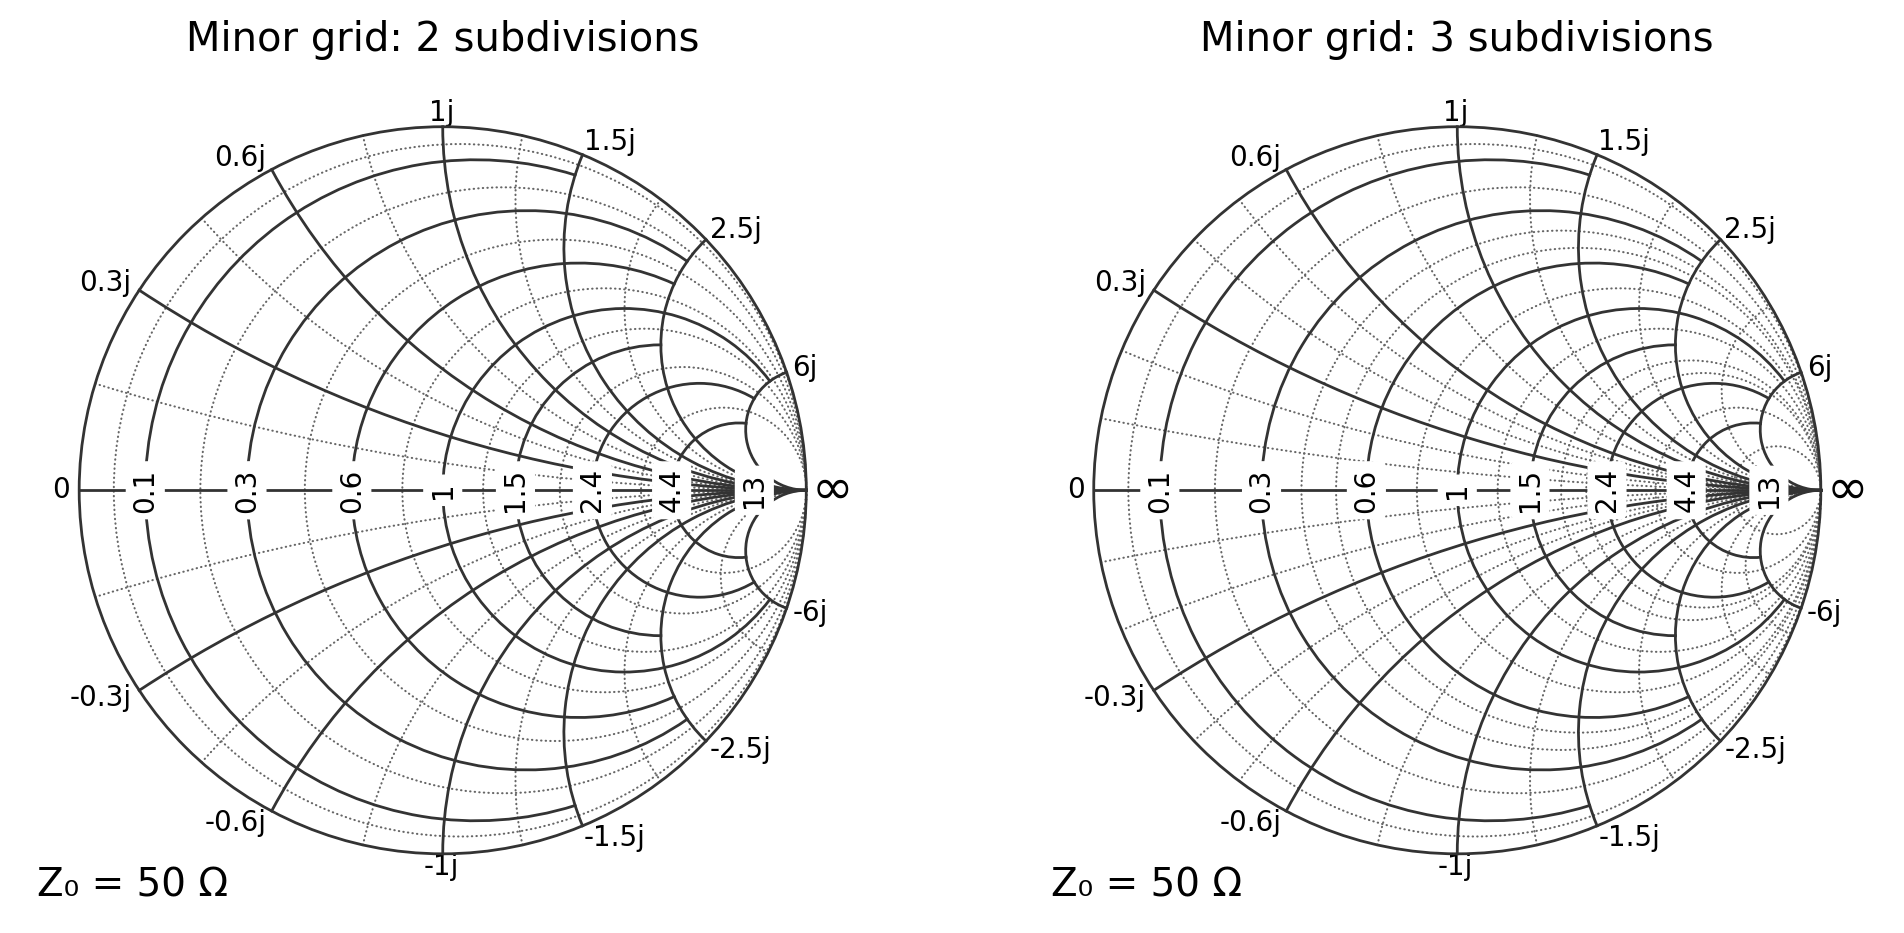

In [15]:
sc1 = {
    "grid.minor.enable": True,
    "grid.minor.xdivisions": 2,
    "grid.minor.ydivisions": 2,
}

sc2 = {
    "grid.minor.enable": True,
    "grid.minor.xdivisions": 3,
    "grid.minor.ydivisions": 3,
}

plt.figure(figsize=(12, 6))

ax1 = plt.subplot(121, projection="smith", **sc1)
ax1.set_title("Minor grid: 2 subdivisions")

ax2 = plt.subplot(122, projection="smith", **sc2)
ax2.set_title("Minor grid: 3 subdivisions")

plt.show()

## 6. “Fancy” grid style

`pysmithchart` supports a “fancy” grid mode that adaptively shortens grid segments to avoid clutter.
To draw a fancy grid, call:

```python
ax.grid(True, which="major", axis=True)
```

This is most useful for major gridlines.

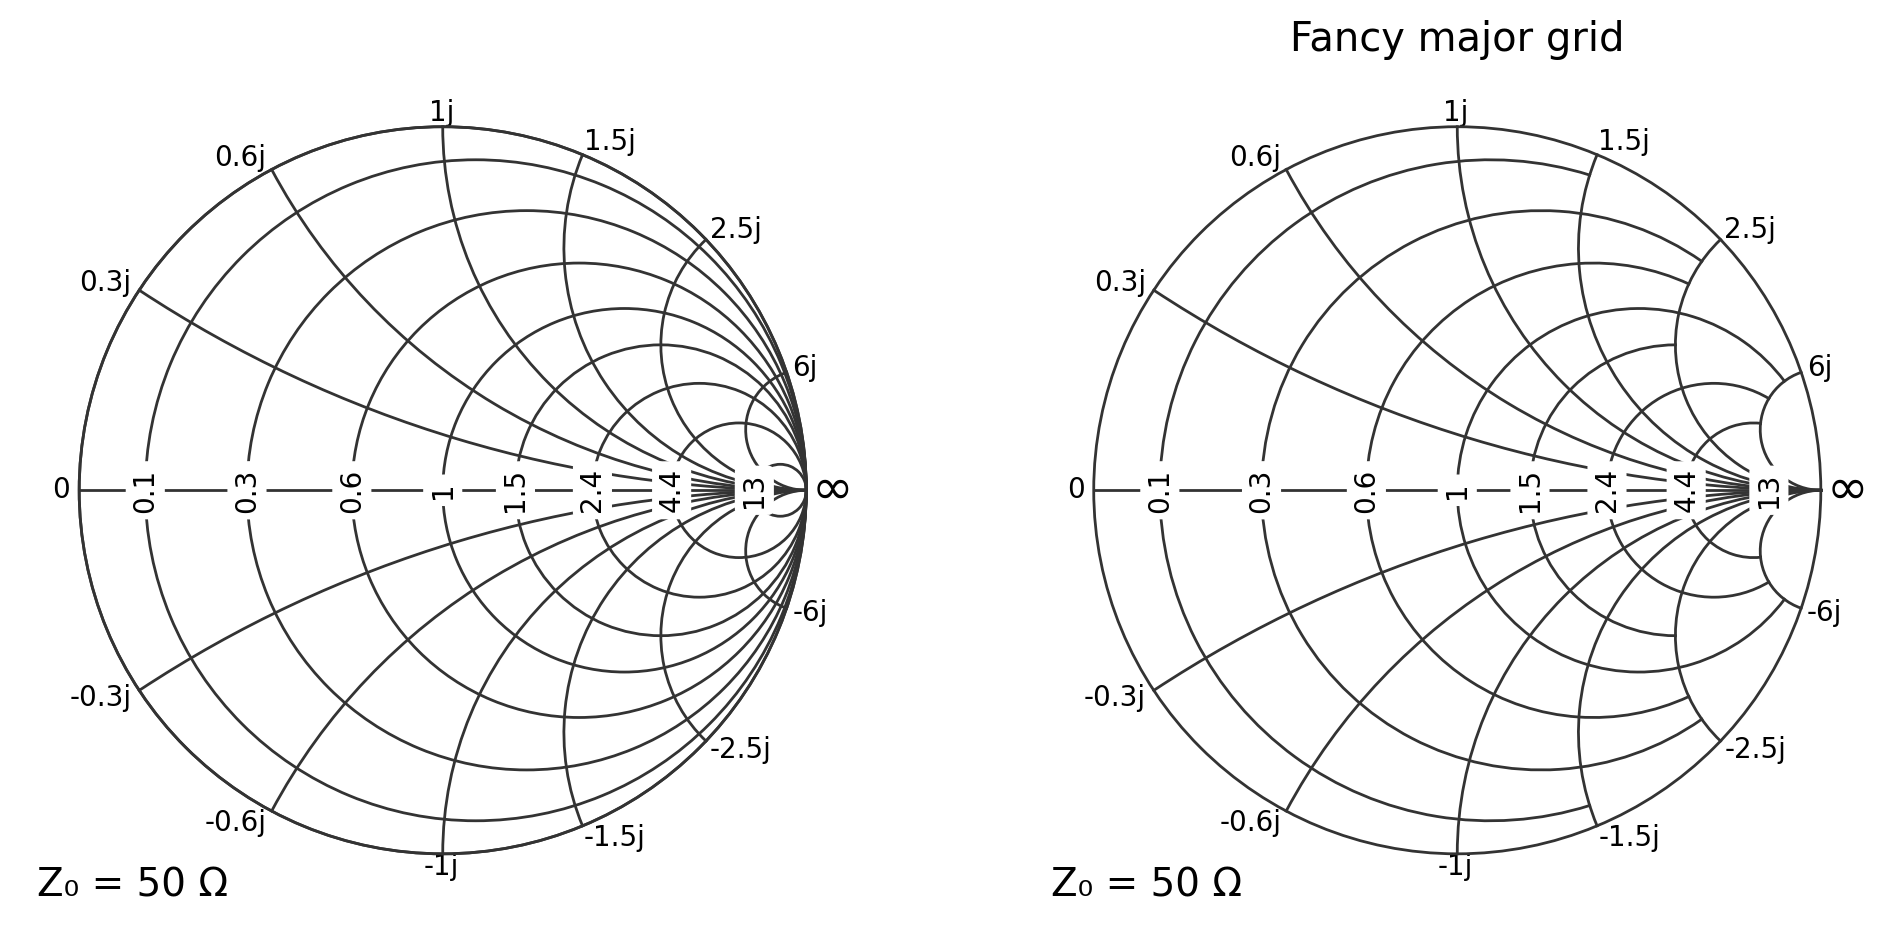

In [12]:
sc1 = {"grid.major.fancy": False}
sc2 = {"grid.major.fancy": True}
plt.figure(figsize=(12, 6))

# Standard major grid
ax = plt.subplot(121, projection="smith", **sc1)
ax1.set_title("Standard major grid")

# Fancy major grid
ax2 = plt.subplot(122, projection="smith", **sc2)
ax2.set_title("Fancy major grid")

plt.show()

## 7. Tick-label formatting and precision

A practical control is the rounding precision used by the major tick locators:

- `grid.locator.precision`

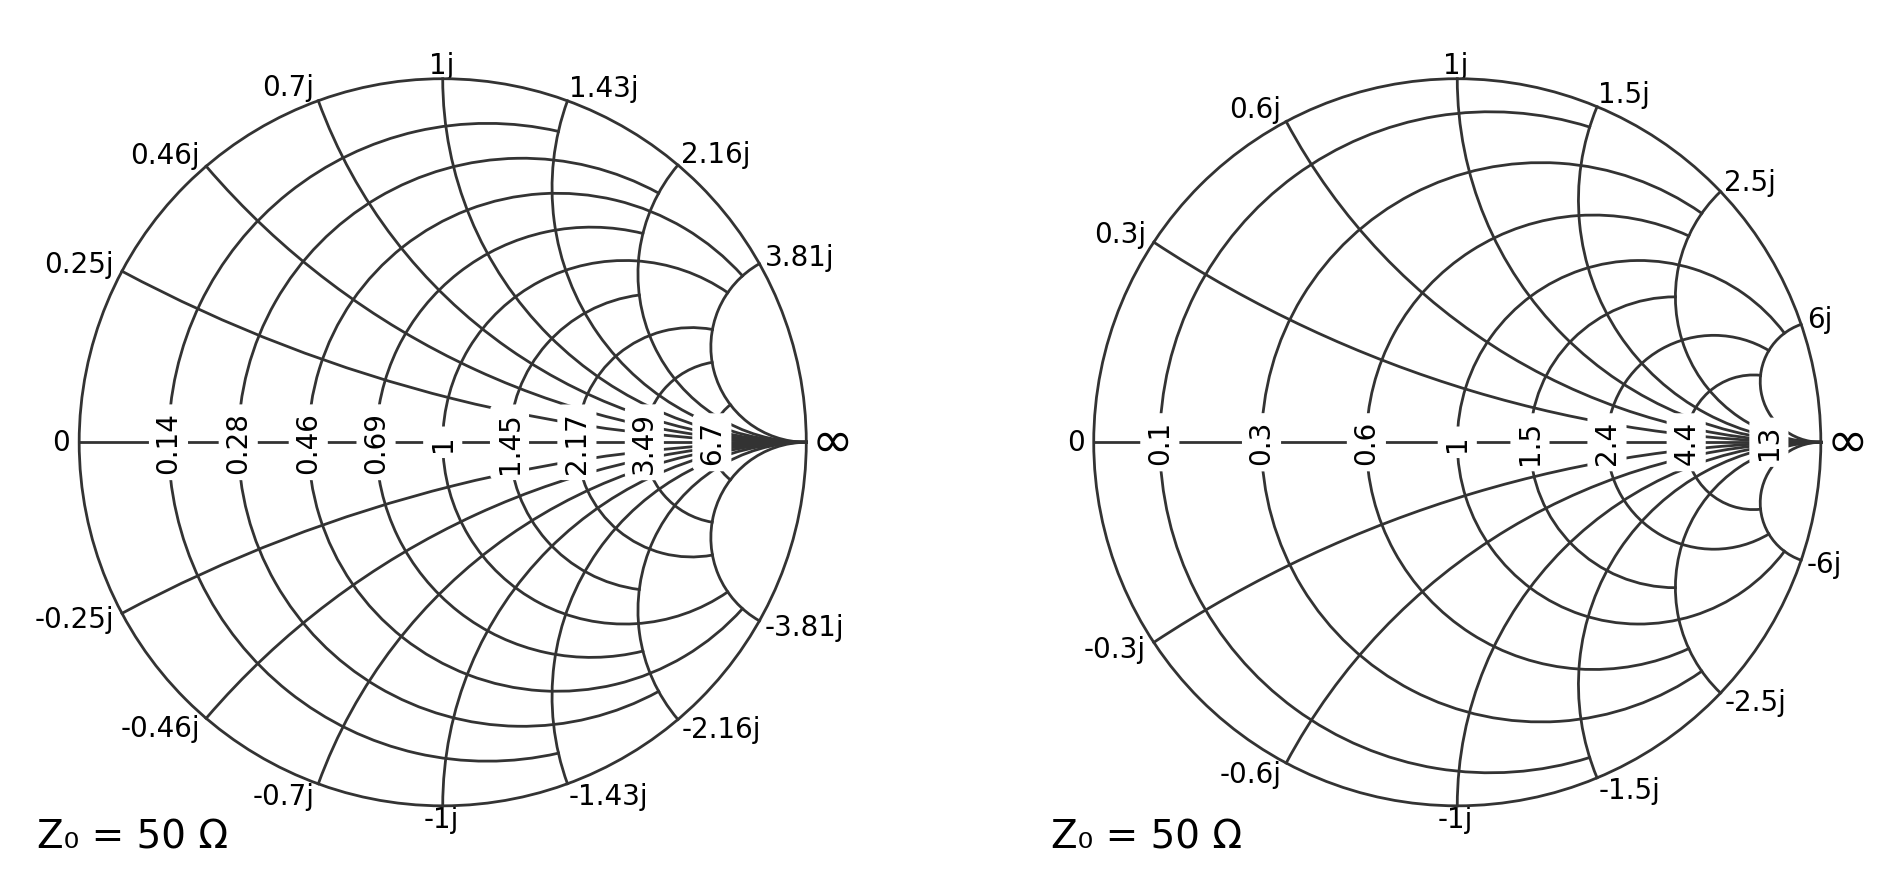

In [13]:
sc1 = {"grid.locator.precision": 4}
sc2 = {"grid.locator.precision": 2}
plt.figure(figsize=(12, 6))

ax = plt.subplot(121, projection="smith", **sc1)
ax1.set_title("Locator precision = 2")

ax = plt.subplot(122, projection="smith", **sc2)
ax2.set_title("Locator precision = 4")

plt.show()

## Summary

- For reusable configuration, build a dict of dot-notation keys and pass it with `**config`.
- Common knobs:
  - enable: `grid.major.enable`, `grid.minor.enable`
  - colors: `grid.major.color`, `grid.minor.color`
  - major count: `grid.major.xmaxn`, `grid.major.ymaxn`
  - minor density: `grid.minor.xauto`, `grid.minor.yauto`
  - rounding: `grid.locator.precision`
  - fancy grid: `ax.grid(..., axis=True)`